AirPassengers_Kaggle.com

In [4]:
!pip install pmdarima
from statsmodels.tsa.arima.model import ARIMA
import urllib.request as urq
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import pmdarima as pm
import statsmodels.api as sm
from statsmodels.tsa.stattools import kpss
from statsmodels.tsa.ar_model import AutoReg
from sklearn.model_selection import TimeSeriesSplit
from sklearn.metrics import mean_squared_error, mean_absolute_error
import warnings
from statsmodels.tools.sm_exceptions import ConvergenceWarning

 Ativos da B3 Bovespa

In [5]:
# Carregar os dados da série temporal
from google.colab import files
uploaded = files.upload()

Saving AirPassengers.csv to AirPassengers.csv


In [6]:
import pandas as pd
import io
df = pd.read_csv("AirPassengers.csv")


In [7]:
df.describe

<bound method NDFrame.describe of        Month  #Passengers
0    1949-01          112
1    1949-02          118
2    1949-03          132
3    1949-04          129
4    1949-05          121
..       ...          ...
139  1960-08          606
140  1960-09          508
141  1960-10          461
142  1960-11          390
143  1960-12          432

[144 rows x 2 columns]>

In [8]:
df

,Month,#Passengers
0,1949-01,112
1,1949-02,118
2,1949-03,132
3,1949-04,129
4,1949-05,121
...,...,...
139,1960-08,606
140,1960-09,508
141,1960-10,461
142,1960-11,390


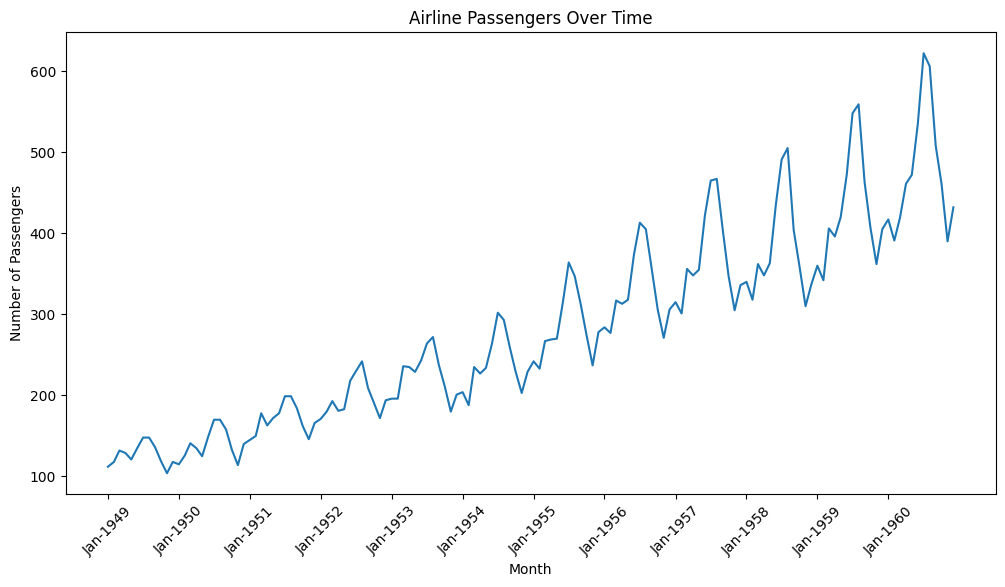

In [9]:
import pandas as pd
import io
import matplotlib.pyplot as plt

# DataFrame do arquivo "AirPassengers.csv"
df = pd.read_csv("AirPassengers.csv")

# Convertendo a coluna 'Month' para o tipo de data
df['Month'] = pd.to_datetime(df['Month'])

# gráfico com a nova escala do eixo x
plt.figure(figsize=(12, 6))
plt.plot(df['Month'], df['#Passengers'])

# Definindo rótulos do eixo x
ticks = pd.date_range(start=df['Month'].min(), end=df['Month'].max(), freq='AS')
plt.xticks(ticks, ticks.strftime('%b-%Y'), rotation=45)

# Adicionar rótulos aos eixos e título ao gráfico
plt.xlabel('Month')
plt.ylabel('Number of Passengers')
plt.title('Airline Passengers Over Time')

# Mostrar o gráfico
plt.show()


In [10]:
s1 = np.asarray(df['Month'])

Predicoes

In [11]:
tam = int(0.9 * len(s1)) # A seção terá 90% do tamanho da série
treino = s1[0 : tam] # A seção da série temporal usada para predição
teste = s1[tam : ] # segmento da série temporal em que serão realizadas os confrontos dos resultados de predição

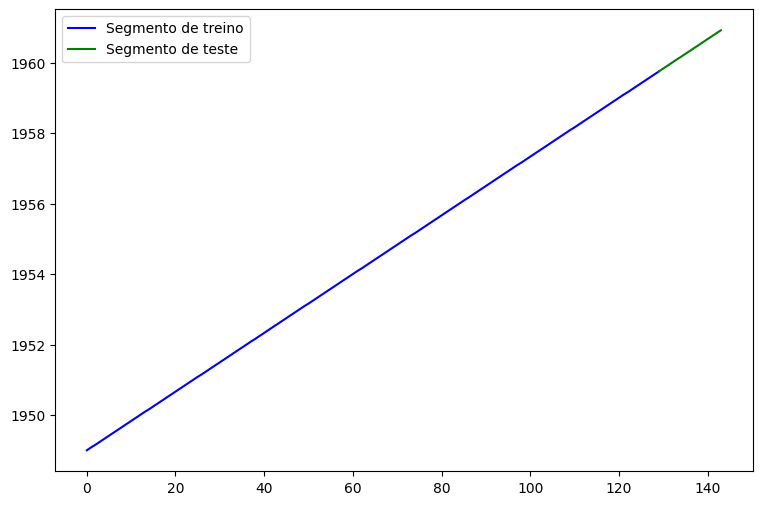

In [12]:
teste_x_axis = range(len(treino), len(s1))
plt.figure(figsize=(9,6))
plt.plot(s1[0 : tam + 1], color='blue')
plt.plot(teste_x_axis,teste, color='Green')
plt.legend(['Segmento de treino', 'Segmento de teste'])
plt.show()

In [13]:
print(df.dtypes)

Month          datetime64[ns]
#Passengers             int64
dtype: object


In [14]:
print(df['Month'].unique())


['1949-01-01T00:00:00.000000000' '1949-02-01T00:00:00.000000000'
 '1949-03-01T00:00:00.000000000' '1949-04-01T00:00:00.000000000'
 '1949-05-01T00:00:00.000000000' '1949-06-01T00:00:00.000000000'
 '1949-07-01T00:00:00.000000000' '1949-08-01T00:00:00.000000000'
 '1949-09-01T00:00:00.000000000' '1949-10-01T00:00:00.000000000'
 '1949-11-01T00:00:00.000000000' '1949-12-01T00:00:00.000000000'
 '1950-01-01T00:00:00.000000000' '1950-02-01T00:00:00.000000000'
 '1950-03-01T00:00:00.000000000' '1950-04-01T00:00:00.000000000'
 '1950-05-01T00:00:00.000000000' '1950-06-01T00:00:00.000000000'
 '1950-07-01T00:00:00.000000000' '1950-08-01T00:00:00.000000000'
 '1950-09-01T00:00:00.000000000' '1950-10-01T00:00:00.000000000'
 '1950-11-01T00:00:00.000000000' '1950-12-01T00:00:00.000000000'
 '1951-01-01T00:00:00.000000000' '1951-02-01T00:00:00.000000000'
 '1951-03-01T00:00:00.000000000' '1951-04-01T00:00:00.000000000'
 '1951-05-01T00:00:00.000000000' '1951-06-01T00:00:00.000000000'
 '1951-07-01T00:00:00.000

Modelo AR utilizando o ARIMA

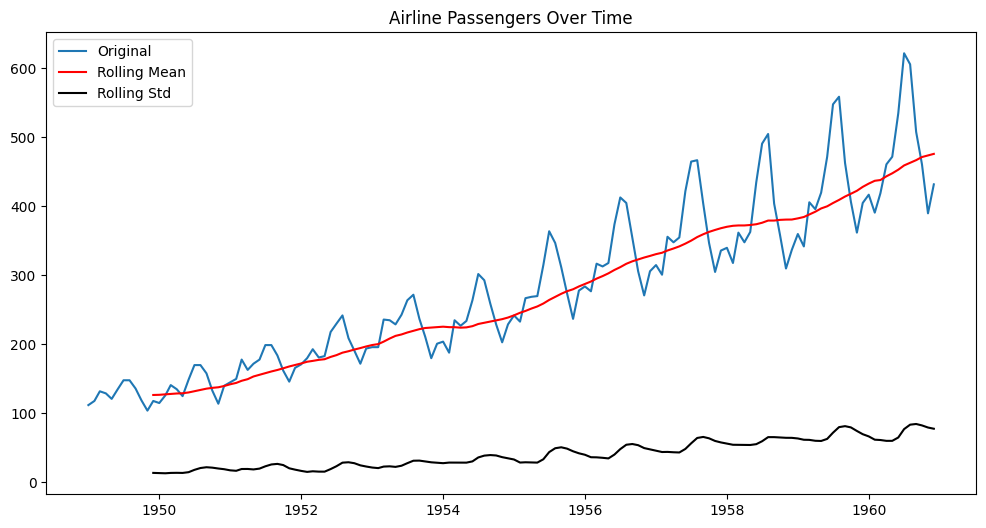

Results of Dickey-Fuller Test:
Test Statistic: 0.8153688792060498
p-value: 0.991880243437641
Lags Used: 13
Number of Observations Used: 130
Critical Values:
   1%: -3.4816817173418295
   5%: -2.8840418343195267
   10%: -2.578770059171598
Results of Dickey-Fuller Test:
Test Statistic: -2.8292668241700047
p-value: 0.05421329028382478
Lags Used: 12
Number of Observations Used: 130
Critical Values:
   1%: -3.4816817173418295
   5%: -2.8840418343195267
   10%: -2.578770059171598


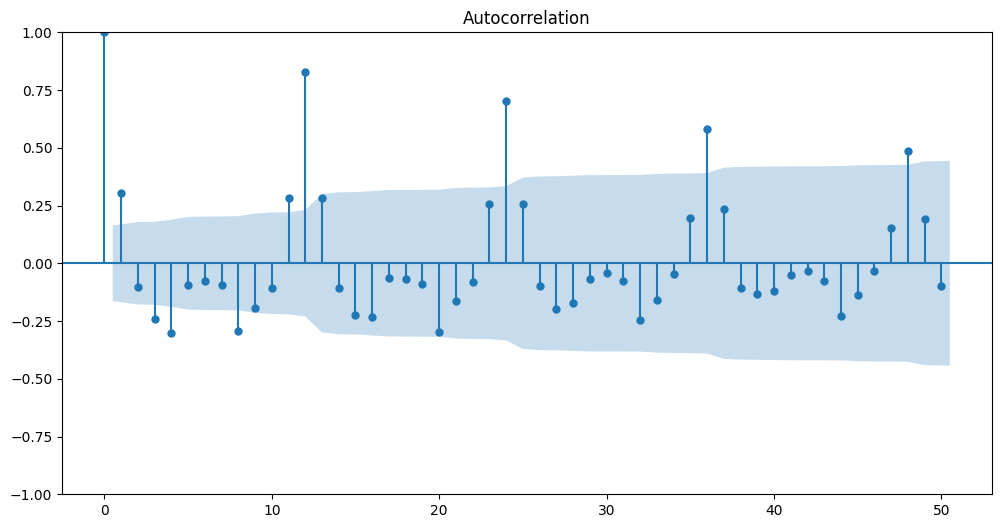

/usr/local/lib/python3.10/dist-packages/statsmodels/graphics/tsaplots.py:348: FutureWarning: The default method 'yw' can produce PACF values outside of the [-1,1] interval. After 0.13, the default will change tounadjusted Yule-Walker ('ywm'). You can use this method now by setting method='ywm'.
  warnings.warn(


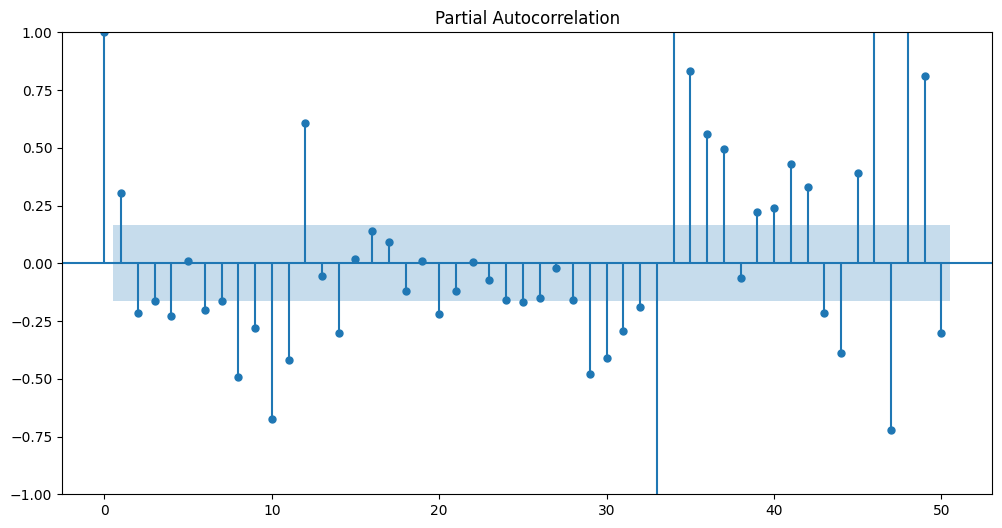

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


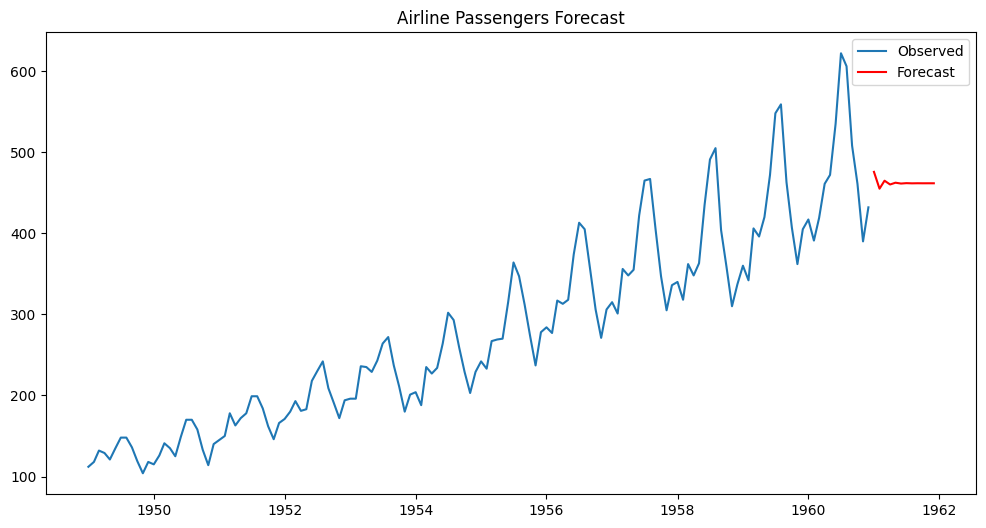

Forecast for the next 12 months:
1961-01-01    475.735059
1961-02-01    454.996073
1961-03-01    464.830415
1961-04-01    460.167010
1961-05-01    462.378378
1961-06-01    461.329756
1961-07-01    461.827008
1961-08-01    461.591213
1961-09-01    461.703026
1961-10-01    461.650005
1961-11-01    461.675148
1961-12-01    461.663225
Freq: MS, Name: predicted_mean, dtype: float64
Média Móvel do Modelo ARIMA:
Month
1949-01-01      0.000000
1949-02-01    112.031916
1949-03-01    119.465739
1949-04-01    135.008557
1949-05-01    125.623055
                 ...    
1960-08-01    630.208754
1960-09-01    592.682963
1960-10-01    481.347765
1960-11-01    465.716986
1960-12-01    358.286564
Length: 144, dtype: float64


In [15]:
# Carregar o DataFrame do arquivo "AirPassengers.csv"
df = pd.read_csv("AirPassengers.csv")

# Convercao a coluna 'Month' para o tipo de data
df['Month'] = pd.to_datetime(df['Month'])

# Definindo 'Month' como o índice do DataFrame
df.set_index('Month', inplace=True)

# Verificando a estacionariedade dos dados usando a média móvel
rolling_mean = df['#Passengers'].rolling(window=12).mean()
rolling_std = df['#Passengers'].rolling(window=12).std()

# Plot  da série temporal, a média móvel e o desvio padrão
plt.figure(figsize=(12, 6))
plt.plot(df['#Passengers'], label='Original')
plt.plot(rolling_mean, label='Rolling Mean', color='red')
plt.plot(rolling_std, label='Rolling Std', color='black')
plt.legend(loc='best')
plt.title('Airline Passengers Over Time')
plt.show()

# Teste Dickey-Fuller para verificar estacionariedade
from statsmodels.tsa.stattools import adfuller

def test_stationarity(timeseries):
    result = adfuller(timeseries, autolag='AIC')
    print('Results of Dickey-Fuller Test:')
    print('Test Statistic:', result[0])
    print('p-value:', result[1])
    print('Lags Used:', result[2])
    print('Number of Observations Used:', result[3])
    print('Critical Values:')
    for key, value in result[4].items():
        print(f'   {key}: {value}')

test_stationarity(df['#Passengers'])

# Diferenciação para tornar os dados estacionários
df_diff = df.diff().dropna()

# Testar estacionariedade após a diferenciação
test_stationarity(df_diff['#Passengers'])

# Encontrar os parâmetros (p, d, q) do modelo ARIMA usando ACF e PACF
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

plt.figure(figsize=(12, 6))
plot_acf(df_diff['#Passengers'], lags=50, ax=plt.gca())
plt.show()

plt.figure(figsize=(12, 6))
plot_pacf(df_diff['#Passengers'], lags=50, ax=plt.gca())
plt.show()

# Ajuste do modelo ARIMA
model = ARIMA(df['#Passengers'], order=(1, 1, 1))
results = model.fit()

# Previsões para os próximos 12 meses
forecast = results.forecast(steps=12)

# Plot das previsões
plt.figure(figsize=(12, 6))
plt.plot(df['#Passengers'], label='Observed')
plt.plot(forecast, label='Forecast', color='red')
plt.legend(loc='best')
plt.title('Airline Passengers Forecast')
plt.show()

# Visualizacao das previsões para os próximos 12 meses
print('Forecast for the next 12 months:')
print(forecast)

# Imprimir a média móvel do modelo ARIMA
print('Média Móvel do Modelo ARIMA:')
print(results.fittedvalues)



Modelo MM usando ARIMA

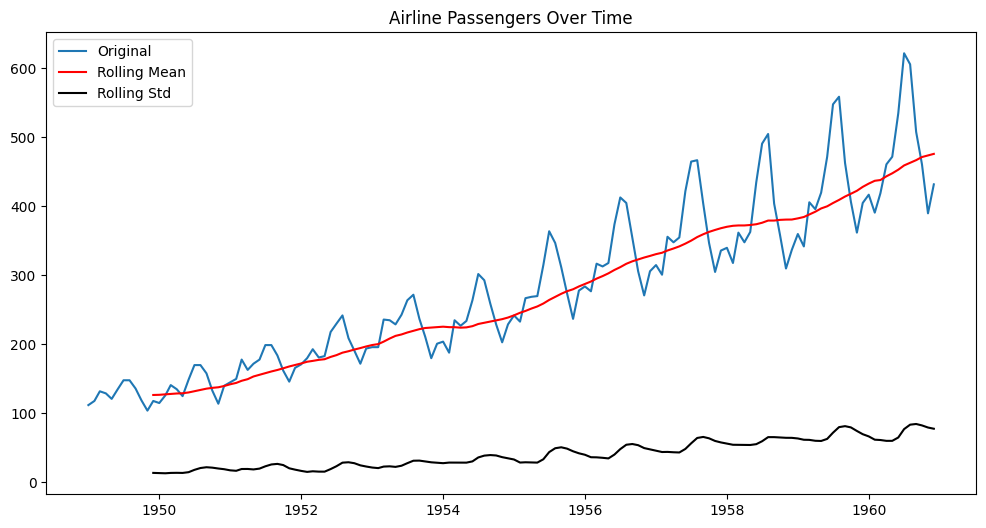

Results of Dickey-Fuller Test:
Test Statistic: 0.8153688792060498
p-value: 0.991880243437641
Lags Used: 13
Number of Observations Used: 130
Critical Values:
   1%: -3.4816817173418295
   5%: -2.8840418343195267
   10%: -2.578770059171598
Results of Dickey-Fuller Test:
Test Statistic: -2.8292668241700047
p-value: 0.05421329028382478
Lags Used: 12
Number of Observations Used: 130
Critical Values:
   1%: -3.4816817173418295
   5%: -2.8840418343195267
   10%: -2.578770059171598


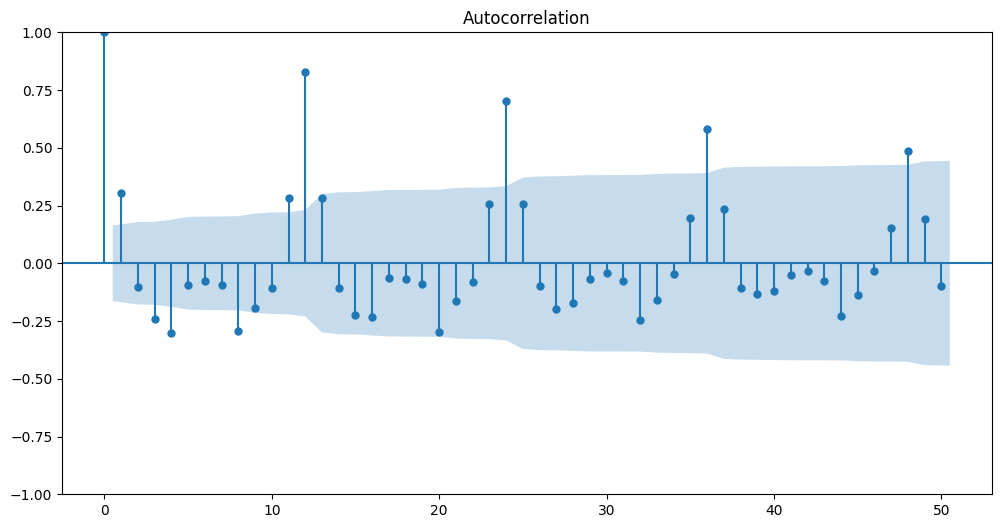

/usr/local/lib/python3.10/dist-packages/statsmodels/graphics/tsaplots.py:348: FutureWarning: The default method 'yw' can produce PACF values outside of the [-1,1] interval. After 0.13, the default will change tounadjusted Yule-Walker ('ywm'). You can use this method now by setting method='ywm'.
  warnings.warn(


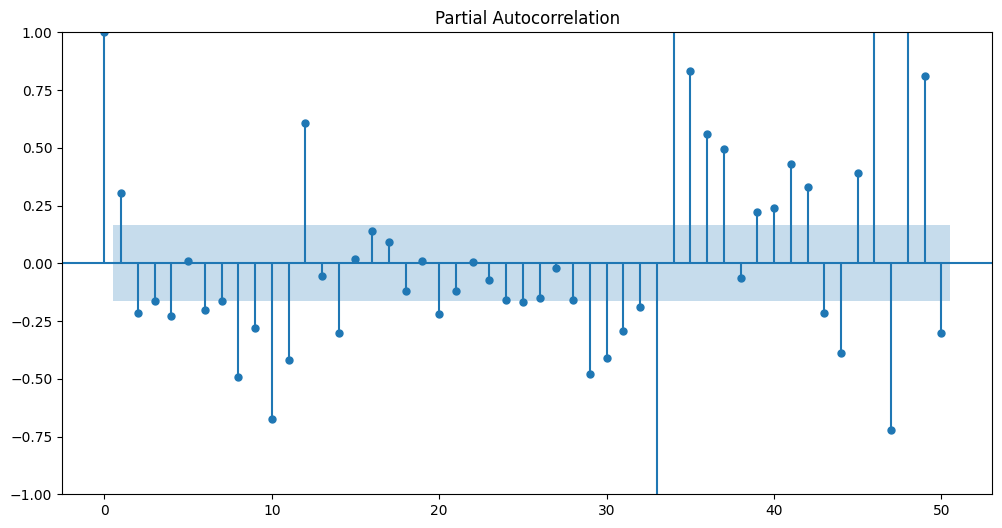

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


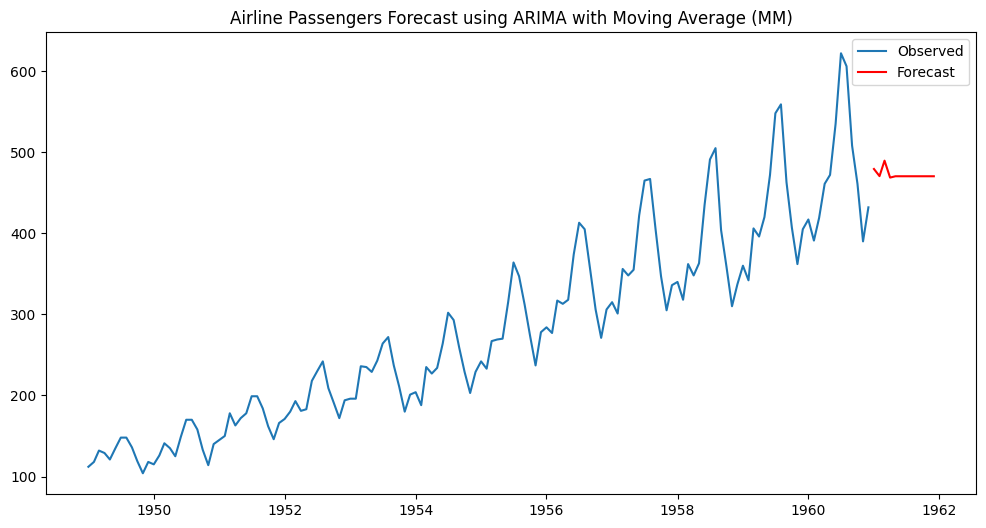

Forecast for the next 12 months using ARIMA with Moving Average (MM):
1961-01-01    479.296041
1961-02-01    470.486782
1961-03-01    489.552427
1961-04-01    468.701298
1961-05-01    470.328302
1961-06-01    470.328302
1961-07-01    470.328302
1961-08-01    470.328302
1961-09-01    470.328302
1961-10-01    470.328302
1961-11-01    470.328302
1961-12-01    470.328302
Freq: MS, Name: predicted_mean, dtype: float64


In [16]:
import pandas as pd
import io
import matplotlib.pyplot as plt
from statsmodels.tsa.arima.model import ARIMA

# Carregar o DataFrame do arquivo "AirPassengers.csv"
df = pd.read_csv("AirPassengers.csv")

# Converter a coluna 'Month' para o tipo de data
df['Month'] = pd.to_datetime(df['Month'])

# Definir 'Month' como o índice do DataFrame
df.set_index('Month', inplace=True)

# Verificar a estacionariedade dos dados usando a média móvel
rolling_mean = df['#Passengers'].rolling(window=12).mean()
rolling_std = df['#Passengers'].rolling(window=12).std()

# Plotar a série temporal, a média móvel e o desvio padrão
plt.figure(figsize=(12, 6))
plt.plot(df['#Passengers'], label='Original')
plt.plot(rolling_mean, label='Rolling Mean', color='red')
plt.plot(rolling_std, label='Rolling Std', color='black')
plt.legend(loc='best')
plt.title('Airline Passengers Over Time')
plt.show()

# Realizar o teste Dickey-Fuller para verificar estacionariedade
from statsmodels.tsa.stattools import adfuller

def test_stationarity(timeseries):
    result = adfuller(timeseries, autolag='AIC')
    print('Results of Dickey-Fuller Test:')
    print('Test Statistic:', result[0])
    print('p-value:', result[1])
    print('Lags Used:', result[2])
    print('Number of Observations Used:', result[3])
    print('Critical Values:')
    for key, value in result[4].items():
        print(f'   {key}: {value}')

test_stationarity(df['#Passengers'])

# Diferenciação para tornar os dados estacionários
df_diff = df.diff().dropna()

# Testar estacionariedade após a diferenciação
test_stationarity(df_diff['#Passengers'])

# Encontrar os parâmetros (p, d, q) do modelo ARIMA usando ACF e PACF
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

plt.figure(figsize=(12, 6))
plot_acf(df_diff['#Passengers'], lags=50, ax=plt.gca())
plt.show()

plt.figure(figsize=(12, 6))
plot_pacf(df_diff['#Passengers'], lags=50, ax=plt.gca())
plt.show()

# Ajustar o modelo ARIMA de Média Móvel (MM)
model = ARIMA(df['#Passengers'], order=(0, 1, 5))
results = model.fit()

# Realizar previsões para os próximos 12 meses
forecast = results.forecast(steps=12)

# Plotar as previsões
plt.figure(figsize=(12, 6))
plt.plot(df['#Passengers'], label='Observed')
plt.plot(forecast, label='Forecast', color='red')
plt.legend(loc='best')
plt.title('Airline Passengers Forecast using ARIMA with Moving Average (MM)')
plt.show()

# Visualizar as previsões para os próximos 12 meses
print('Forecast for the next 12 months using ARIMA with Moving Average (MM):')
print(forecast)


Modelo ARMA usando  ARIMA

In [22]:
df = pd.read_csv("AirPassengers.csv")
print(df.head())




     Month  #Passengers
0  1949-01          112
1  1949-02          118
2  1949-03          132
3  1949-04          129
4  1949-05          121


In [25]:
# Definicao a coluna de data como o índice e converter para o tipo de data
df['Month'] = pd.to_datetime(df['Month'])
df.set_index('Month', inplace=True)


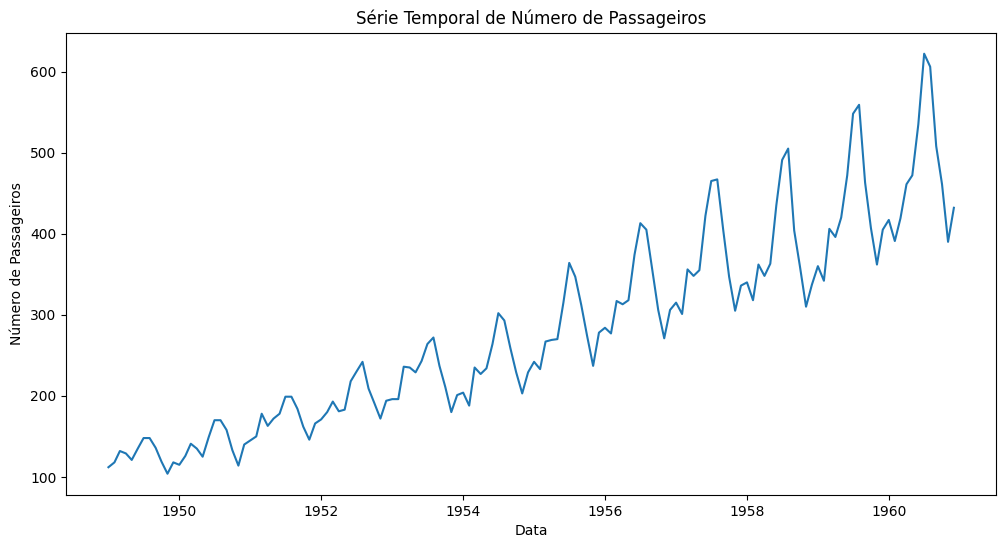

In [26]:
# Plot dos dados para visualizar a série temporal
plt.figure(figsize=(12, 6))
plt.plot(df)
plt.xlabel('Data')
plt.ylabel('Número de Passageiros')
plt.title('Série Temporal de Número de Passageiros')
plt.show()


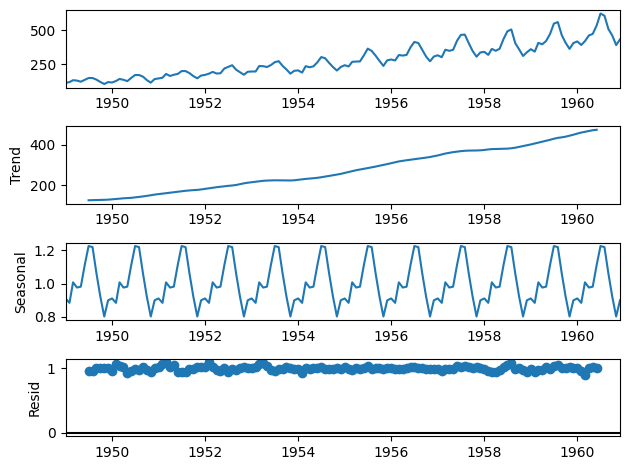

In [27]:
# Realizar a decomposição da série temporal em componentes de tendência, sazonalidade e residual:
from statsmodels.tsa.seasonal import seasonal_decompose

result = seasonal_decompose(df, model='multiplicative')
result.plot()
plt.show()


In [53]:
import pandas as pd
import matplotlib.pyplot as plt
import statsmodels.api as sm
from statsmodels.tsa.arima.model import ARIMA

df = pd.read_csv("AirPassengers.csv")

# Converter a coluna de data para o formato de data
df['Month'] = pd.to_datetime(df['Month'])

# Definir a coluna de data como o índice do DataFrame
df.set_index('Month', inplace=True)

# Ajuste do modelo ARMA
model = ARIMA(df, order=(2, 1, 1))  # Exemplo: Ordem (2, 1, 1) para ARIMA(2, 1, 1)

#ajuste do modelo
results = model.fit()

# Fazer previsões usando o modelo ajustado
forecast = results.predict(start=len(df), end=len(df) + 12, dynamic=True)  # Previsão para 12 períodos futuros

                               SARIMAX Results                                
Dep. Variable:            #Passengers   No. Observations:                  144
Model:                 ARIMA(2, 1, 1)   Log Likelihood                -685.169
Date:                Fri, 21 Jul 2023   AIC                           1378.338
Time:                        17:47:25   BIC                           1390.190
Sample:                    01-01-1949   HQIC                          1383.154
                         - 12-01-1960                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          1.0907      0.083     13.190      0.000       0.929       1.253
ar.L2         -0.4890      0.097     -5.046      0.000      -0.679      -0.299
ma.L1         -0.8439      0.073    -11.486      0.0

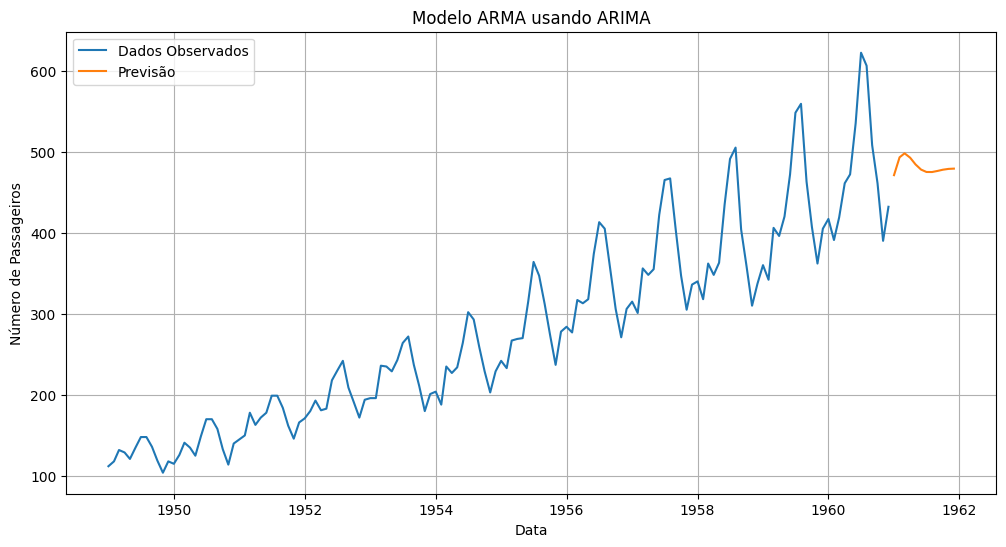

In [54]:
# resumo das estatísticas do modelo ajustado
print(results.summary())

# previsões usando o modelo ajustado
forecast = results.forecast(steps=12, dynamic=True)  # Previsão para 12 períodos futuros

# Plot dos resultados
plt.figure(figsize=(12, 6))
plt.plot(df, label='Dados Observados')
plt.plot(forecast, label='Previsão')
plt.legend()
plt.xlabel('Data')
plt.ylabel('Número de Passageiros')
plt.title('Modelo ARMA usando ARIMA')
plt.grid(True)
plt.show()

Modelo ARIMA

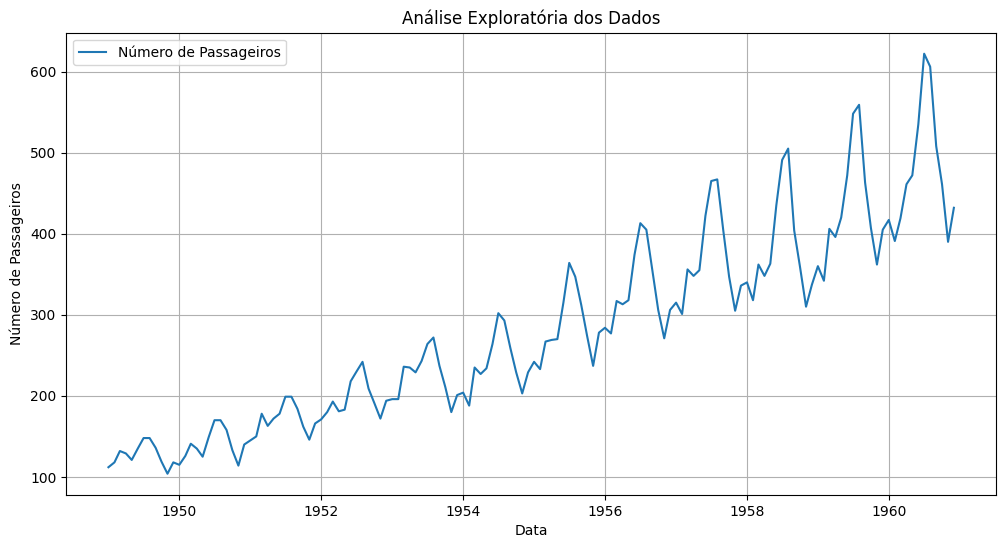

Estatística do teste Dickey-Fuller Aumentado: 0.8153688792060498
Valor-p: 0.991880243437641
Valores críticos: {'1%': -3.4816817173418295, '5%': -2.8840418343195267, '10%': -2.578770059171598}


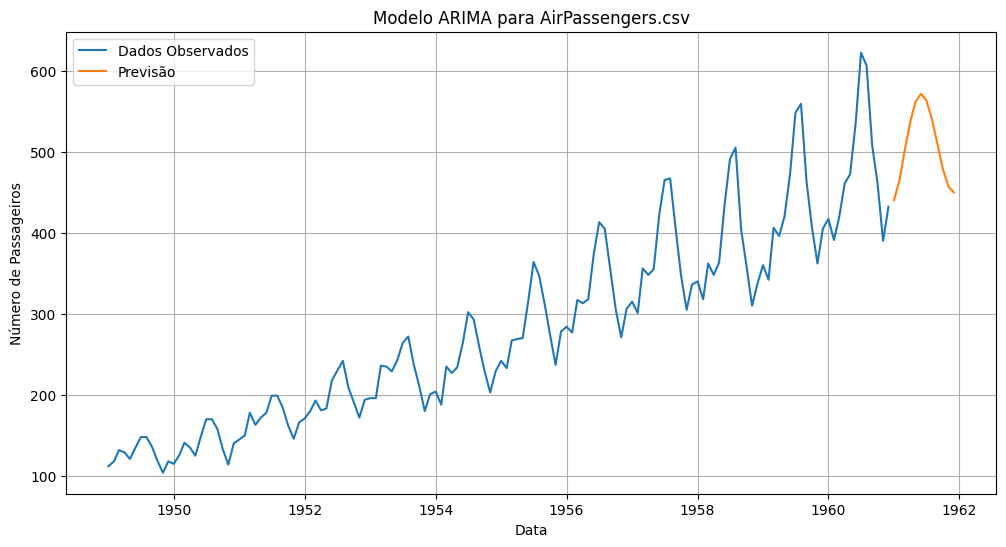

In [56]:
import pandas as pd
import matplotlib.pyplot as plt
import statsmodels.api as sm

# Carregar o conjunto de dados
df = pd.read_csv("AirPassengers.csv")

# Converter a coluna de data para o formato de data
df['Month'] = pd.to_datetime(df['Month'])

# Definir a coluna de data como o índice do DataFrame
df.set_index('Month', inplace=True)

# Análise exploratória
plt.figure(figsize=(12, 6))
plt.plot(df, label='Número de Passageiros')
plt.xlabel('Data')
plt.ylabel('Número de Passageiros')
plt.title('Análise Exploratória dos Dados')
plt.grid(True)
plt.legend()
plt.show()

# Testar a estacionaridade dos dados (exemplo: usando o teste de Dickey-Fuller aumentado)
from statsmodels.tsa.stattools import adfuller

result = adfuller(df)
print("Estatística do teste Dickey-Fuller Aumentado:", result[0])
print("Valor-p:", result[1])
print("Valores críticos:", result[4])

# Ajustar o modelo ARIMA
order = (2, 1, 2)  # Exemplo de ordem (p, d, q) para ARIMA(2, 1, 2)
model = sm.tsa.ARIMA(df, order=order)
results = model.fit()

# Fazer previsões usando o modelo ajustado
forecast = results.forecast(steps=12)  # Previsão para 12 períodos futuros

# Plotar os resultados
plt.figure(figsize=(12, 6))
plt.plot(df, label='Dados Observados')
plt.plot(forecast, label='Previsão')
plt.xlabel('Data')
plt.ylabel('Número de Passageiros')
plt.title('Modelo ARIMA para AirPassengers.csv')
plt.grid(True)
plt.legend()
plt.show()


Validação cruzada no modelo ARIMA

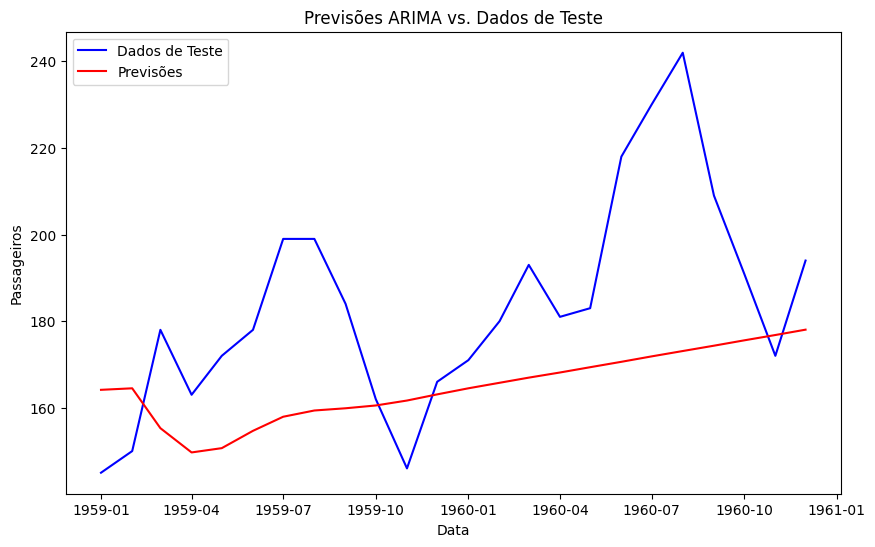

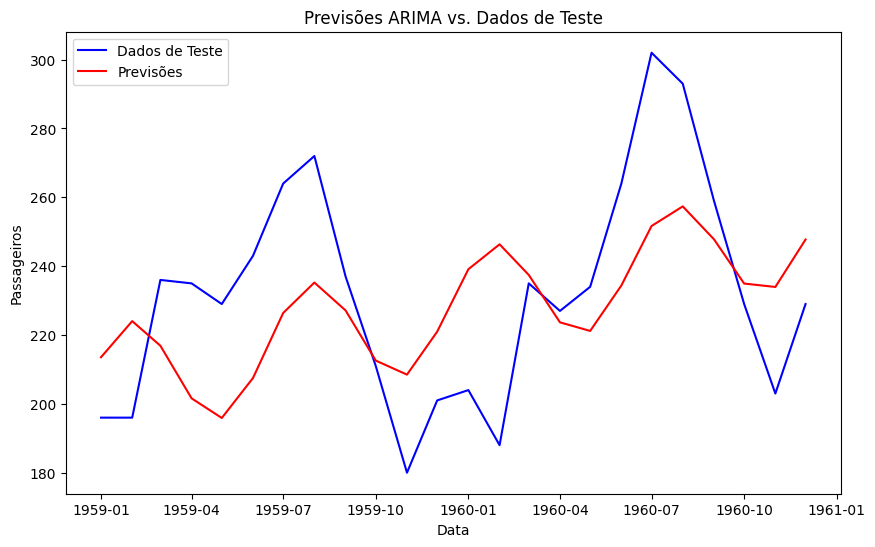

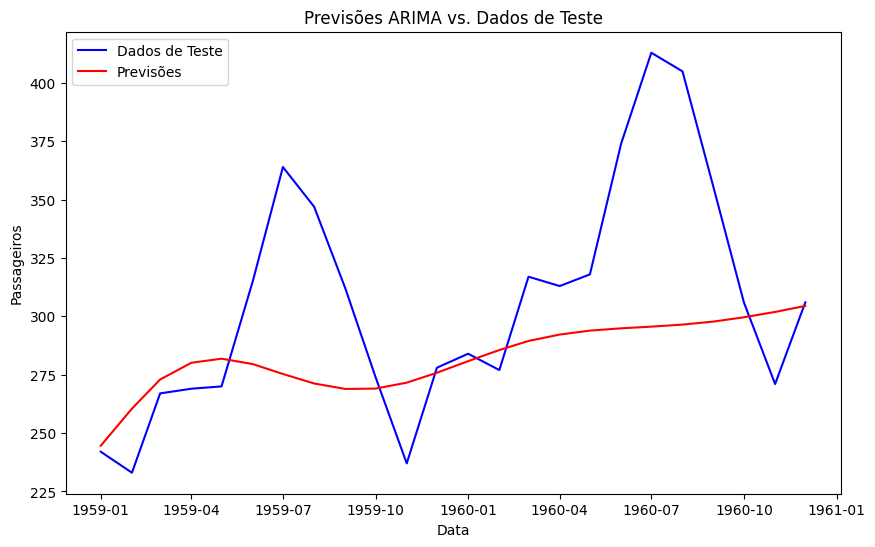

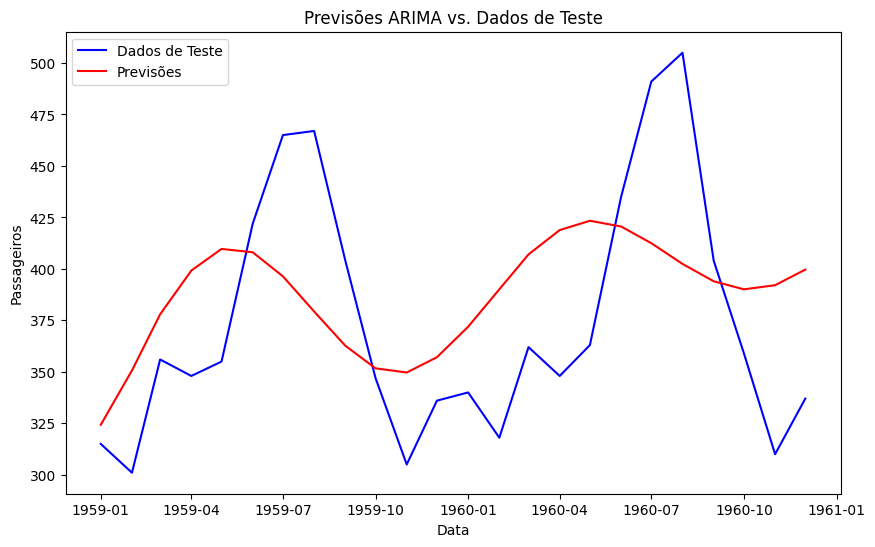

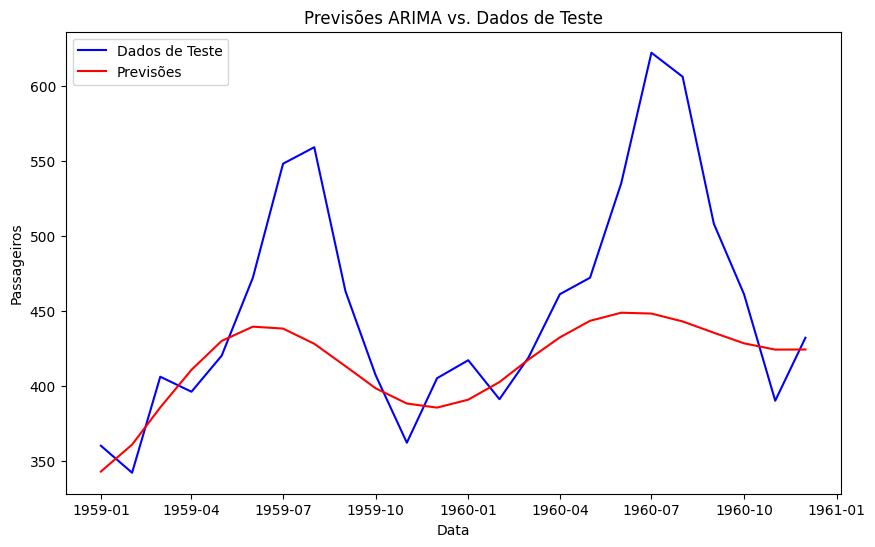

MSE: 2310.569
RMSE: 45.640
MAE: 35.321


In [61]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import TimeSeriesSplit
from statsmodels.tsa.arima.model import ARIMA
from sklearn.metrics import mean_absolute_error, mean_squared_error

# Carregar o conjunto de dados
df = pd.read_csv("AirPassengers.csv")

# Converter a coluna de data para o formato de data
df['Month'] = pd.to_datetime(df['Month'])

# Definir a coluna de data como o índice do DataFrame
df.set_index('Month', inplace=True)

# Converter a coluna de número de passageiros em um array numpy
stA = np.asarray(df)

# Definir o número de divisões para a validação cruzada
n_splits = 5
tss = TimeSeriesSplit(n_splits=n_splits)

# Listas para armazenar as métricas de avaliação
mse = []
rmse = []
mae = []

# Loop sobre as divisões da validação cruzada
for i_treino, i_teste in tss.split(stA):
    treinoCV = stA[i_treino]
    testeCV = stA[i_teste]

    # Ajustar o modelo ARIMA ao conjunto de treinamento
    modelo = ARIMA(treinoCV, order=(2, 1, 2), trend='t').fit()

    # Fazer previsões no conjunto de teste
    pred = modelo.forecast(steps=len(testeCV))

    # Calcular as métricas de avaliação (MSE, RMSE e MAE)
    mse.append(mean_squared_error(testeCV, pred))
    rmse.append(np.sqrt(mse[-1]))
    mae.append(mean_absolute_error(testeCV, pred))

    # Plot das previsões em comparação com os dados de teste
    plt.figure(figsize=(10, 6))
    plt.plot(df.index[-len(testeCV):], testeCV, label='Dados de Teste', color='blue')
    plt.plot(df.index[-len(testeCV):], pred, label='Previsões', color='red')
    plt.xlabel('Data')
    plt.ylabel('Passageiros')
    plt.title('Previsões ARIMA vs. Dados de Teste')
    plt.legend()
    plt.show()

# Calcular as médias das métricas de avaliação
print('MSE: %.3f' % np.mean(mse))
print('RMSE: %.3f' % np.mean(rmse))
print('MAE: %.3f' % np.mean(mae))


